# Exploratory Data Analysis


## Pulling up the cell images

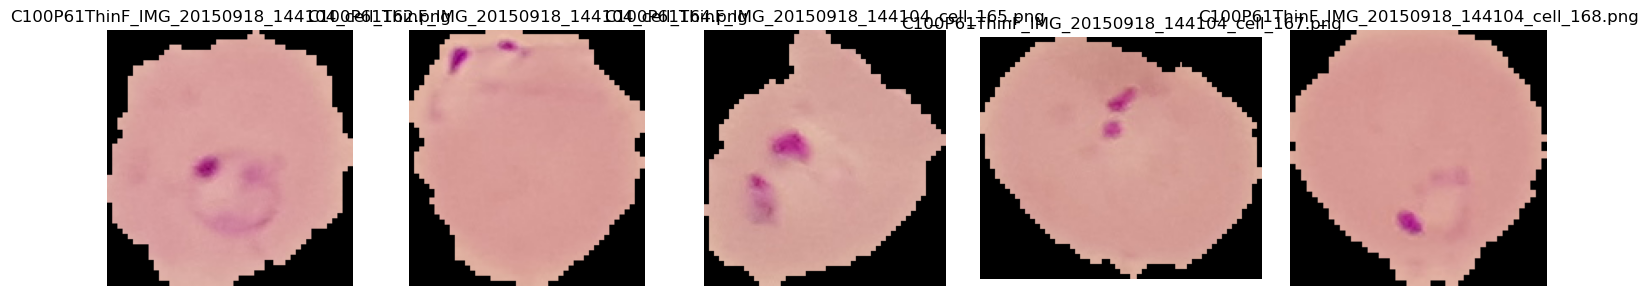

In [3]:
#Unprocessed images parasitized
import cv2
import matplotlib.pyplot as plt
import os

# Folder containing the images
folder_path = 'C:\\Users\\sharm\\Desktop\\UofT BootCamp Challenges\\project4-local\\cell_images\\Parasitized'

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg'))]

# Number of images to display in a single row
num_images_to_display = 5

# Create subplots with a single row and the specified number of columns
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Display the images in the subplots
for i in range(num_images_to_display):
    if i < len(image_files):
        image_path = os.path.join(folder_path, image_files[i])
        image = cv2.imread(image_path)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(image_files[i])
        axes[i].axis('off')  # Turn off axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


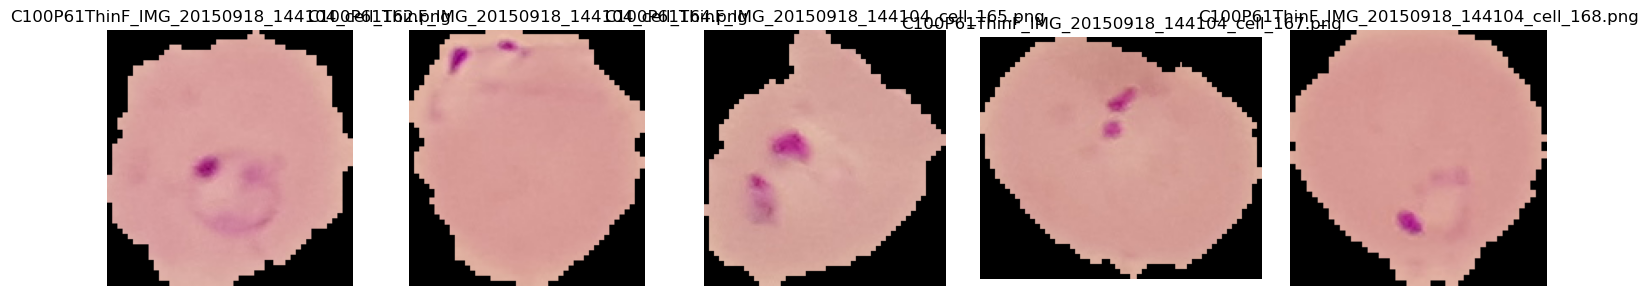

In [4]:
#Processed images parasitized
import cv2
import matplotlib.pyplot as plt
import os

# Folder containing the images
folder_path = 'C:\\Users\\sharm\\Desktop\\UofT BootCamp Challenges\\project4-local\\cell_images\\Parasitized'

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg'))]

# Number of images to display in a single row
num_images_to_display = 5

# Create subplots with a single row and the specified number of columns
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Display the images in the subplots
for i in range(num_images_to_display):
    if i < len(image_files):
        image_path = os.path.join(folder_path, image_files[i])
        image = cv2.imread(image_path)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(image_files[i])
        axes[i].axis('off')  # Turn off axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


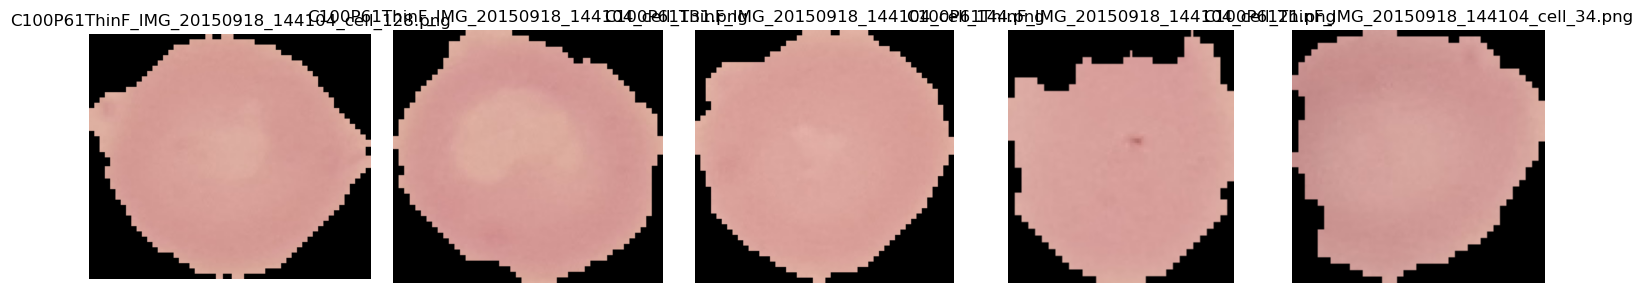

In [5]:
#Have python pull up an images of a cell - Unprocessed Images of Uninfected Cell

from skimage import io, color, feature, measure

# Folder containing the images
folder_path = 'C:\\Users\\sharm\\Desktop\\UofT BootCamp Challenges\\project4-local\\cell_images\\Uninfected'

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg'))]

# Number of images to display in a single row
num_images_to_display = 5

# Create subplots with a single row and the specified number of columns
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Display the images in the subplots
for i in range(num_images_to_display):
    if i < len(image_files):
        image_path = os.path.join(folder_path, image_files[i])
        image = cv2.imread(image_path)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(image_files[i])
        axes[i].axis('off')  # Turn off axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

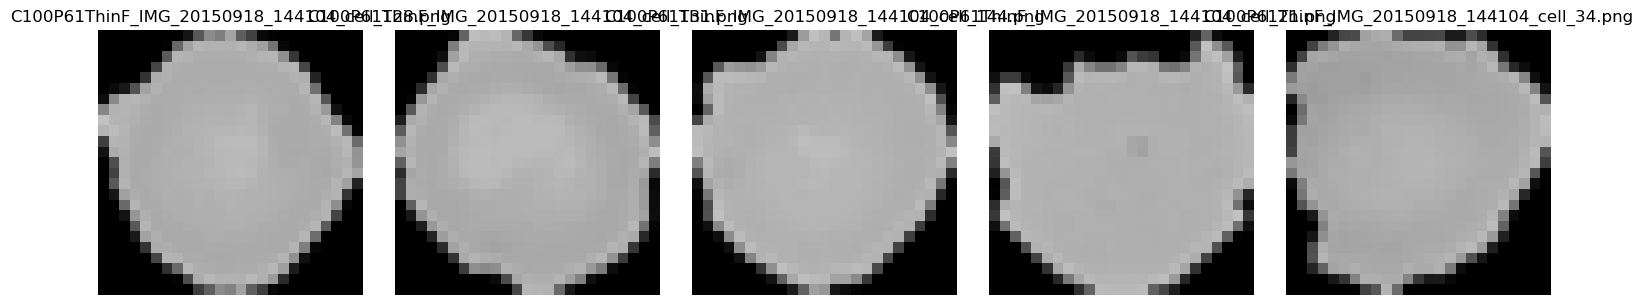

In [149]:
#Have python pull up an images of a cell - Processed Images of Uninfected Cell

from skimage import io, color, feature, measure

# Folder containing the images
folder_path = 'Dataset/clean/output_uninfected_process'

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg'))]

# Number of images to display in a single row
num_images_to_display = 5

# Create subplots with a single row and the specified number of columns
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Display the images in the subplots
for i in range(num_images_to_display):
    if i < len(image_files):
        image_path = os.path.join(folder_path, image_files[i])
        image = cv2.imread(image_path)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(image_files[i])
        axes[i].axis('off')  # Turn off axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Assessing Blobs to determine the mean blob size and the max blob size

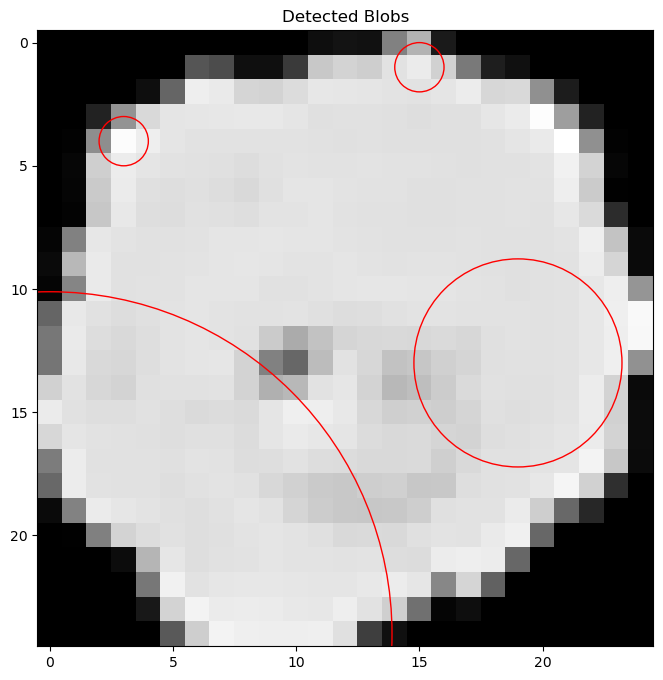

In [100]:
#For parasitized

# Load the image
image = io.imread('Dataset/clean/output_parasitized_process/C100P61ThinF_IMG_20150918_144104_cell_162.png')

# Detect blobs using the Laplacian of Gaussian (LoG) method
blobs = feature.blob_log(image, max_sigma=30, threshold=0.02)

# Create a figure to visualize the blobs
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')

# Plot the detected blobs as circles
for blob in blobs:
    y, x, r = blob[0], blob[1], blob[2]
    c = plt.Circle((x, y), r, color='red', fill=False)
    ax.add_patch(c)

ax.set_title('Detected Blobs')
plt.show()


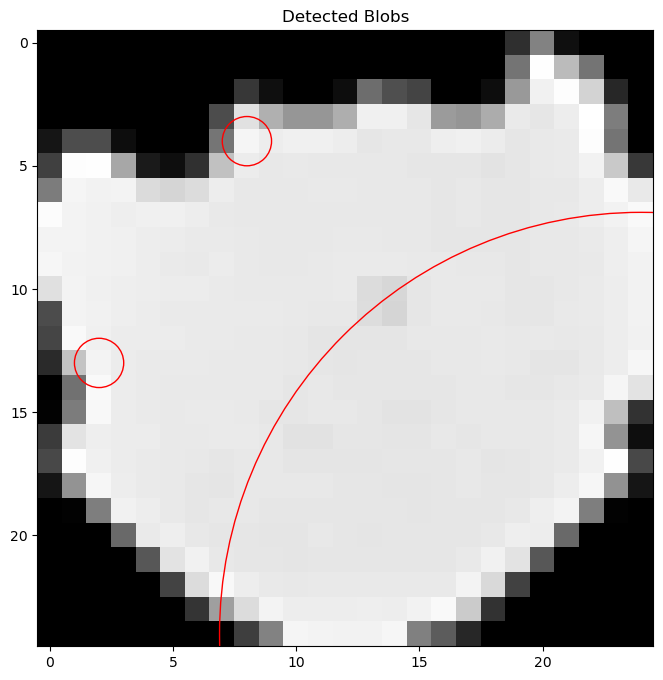

In [101]:
#For uninfected

# Load the image
image = io.imread('Dataset/clean/output_uninfected_process/C100P61ThinF_IMG_20150918_144104_cell_21.png')

# Detect blobs using the Laplacian of Gaussian (LoG) method
blobs = feature.blob_log(image, max_sigma=30, threshold=0.02)

# Create a figure to visualize the blobs
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')

# Plot the detected blobs as circles
for blob in blobs:
    y, x, r = blob[0], blob[1], blob[2]
    c = plt.Circle((x, y), r, color='red', fill=False)
    ax.add_patch(c)

ax.set_title('Detected Blobs')
plt.show()


In [120]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import blob_log

# Function to extract blob features from an image
def extract_blob_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blobs = blob_log(img, max_sigma=30, threshold=0.02)
    if len(blobs) > 0:
        blob_sizes = blobs[:, 2]
        mean_blob_size = np.mean(blob_sizes)
        max_blob_size = np.max(blob_sizes)
        return [mean_blob_size, max_blob_size]
    else:
        return [0, 0]

# Paths to image folders (uninfected and infected)
uninfected_folder = 'Dataset/clean/output_uninfected_process'
infected_folder = 'Dataset\clean\output_parasitized_process'

# Create lists to store blob features
uninfected_features = []
infected_features = []

# Extract blob features for uninfected cells
for filename in os.listdir(uninfected_folder)[:500]:
    image_path = os.path.join(uninfected_folder, filename)
    features = extract_blob_features(image_path)
    uninfected_features.append(features)

# Extract blob features for infected cells
for filename in os.listdir(infected_folder)[:500]:
    image_path = os.path.join(infected_folder, filename)
    features = extract_blob_features(image_path)
    infected_features.append(features)

# Create DataFrames from the features
uninfected_blob_df = pd.DataFrame(uninfected_features, columns=['Uninfected_MeanBlobSize', 'Uninfected_MaxBlobSize'])
infected_blob_df = pd.DataFrame(infected_features, columns=['Infected_MeanBlobSize', 'Infected_MaxBlobSize'])




In [121]:
#Check the uninfected df
uninfected_blob_df.head()

,Uninfected_MeanBlobSize,Uninfected_MaxBlobSize
0,2.074074,7.444444
1,1.585859,7.444444
2,3.148148,13.888889
3,6.370370,17.111111
4,4.222222,13.888889


In [122]:
#Check the infected df
infected_blob_df.head()

,Infected_MeanBlobSize,Infected_MaxBlobSize
0,5.027778,13.888889
1,5.833333,13.888889
2,4.866667,13.888889
3,3.148148,13.888889
4,2.611111,7.444444


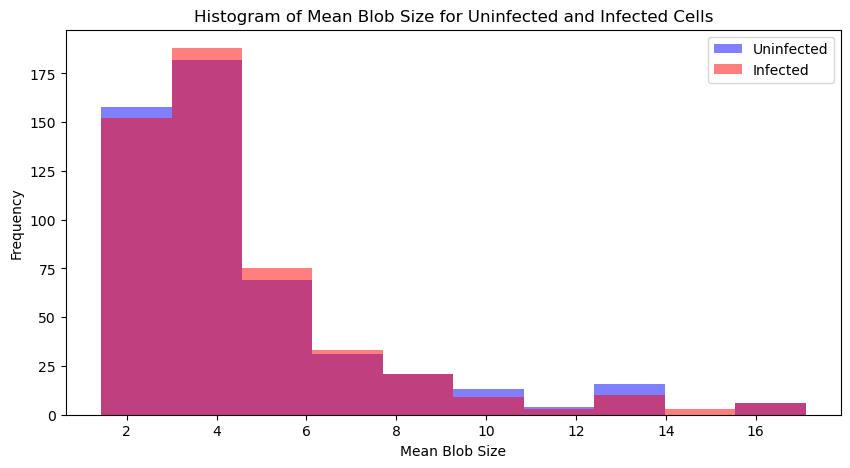

In [123]:
# Create histograms for uninfected and infected cells
plt.figure(figsize=(10, 5))

plt.hist(uninfected_blob_df['Uninfected_MeanBlobSize'], bins=10, alpha=0.5, label='Uninfected', color='blue')
plt.hist(infected_blob_df['Infected_MeanBlobSize'], bins=10, alpha=0.5, label='Infected', color='red')

plt.xlabel('Mean Blob Size')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Blob Size for Uninfected and Infected Cells')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## Utilize Statistics 

In [125]:
from scipy import stats
# Perform t-test
t_stat, p_value = stats.ttest_ind(infected_blob_df['Infected_MeanBlobSize'], uninfected_blob_df['Uninfected_MeanBlobSize'], equal_var=False)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between uninfected and infected cells.")
else:
    print("There is no statistically significant difference between uninfected and infected cells.")


There is no statistically significant difference between uninfected and infected cells.


In [107]:
print(f"the p_value for the mean blob size is {p_value}")

the p_value for the mean blob size is 0.9339605156712071


In [126]:
from scipy.stats import mannwhitneyu
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(infected_blob_df['Infected_MeanBlobSize'], uninfected_blob_df['Uninfected_MeanBlobSize'], )

# Set significance level (alpha)
alpha = 0.05

# Compare p-value to alpha and interpret the result
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between uninfected and infected cells.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between uninfected and infected cells.")

# Print the test statistic and p-value
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. There is no significant difference between uninfected and infected cells.
Test Statistic: 127456.0
P-value: 0.590136159649767


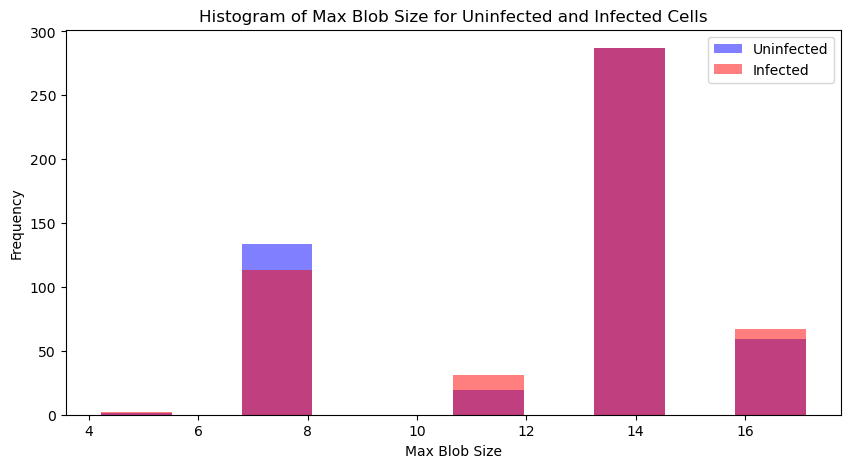

In [127]:
# Create histograms for uninfected and infected cells
plt.figure(figsize=(10, 5))

plt.hist(uninfected_blob_df['Uninfected_MaxBlobSize'], bins=10, alpha=0.5, label='Uninfected', color='blue')
plt.hist(infected_blob_df['Infected_MaxBlobSize'], bins=10, alpha=0.5, label='Infected', color='red')

plt.xlabel('Max Blob Size')
plt.ylabel('Frequency')
plt.title('Histogram of Max Blob Size for Uninfected and Infected Cells')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [128]:
from scipy import stats
# Perform t-test
t_stat, p_value = stats.ttest_ind(infected_blob_df['Infected_MaxBlobSize'], uninfected_blob_df['Uninfected_MaxBlobSize'], equal_var=False)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between uninfected and infected cells.")
else:
    print("There is no statistically significant difference between uninfected and infected cells.")
(f"the p_value for the max blob size is {p_value}")

There is no statistically significant difference between uninfected and infected cells.


'the p_value for the max blob size is 0.27090302896311413'

In [129]:
from scipy.stats import mannwhitneyu
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(infected_blob_df['Infected_MaxBlobSize'], uninfected_blob_df['Uninfected_MaxBlobSize'])

# Set significance level (alpha)
alpha = 0.05

# Compare p-value to alpha and interpret the result
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between uninfected and infected cells.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between uninfected and infected cells.")

# Print the test statistic and p-value
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. There is no significant difference between uninfected and infected cells.
Test Statistic: 129070.5
P-value: 0.31711731761026807


## Assessing Edges

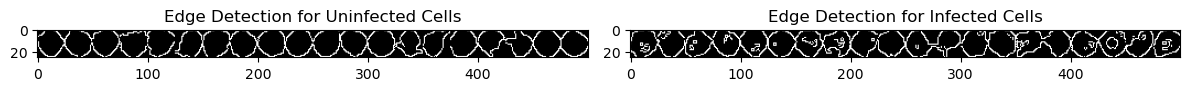

In [112]:
### Assessing edges

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to image folders (uninfected and infected)
uninfected_folder = 'Dataset/clean/output_uninfected_process'
infected_folder = 'Dataset\clean\output_parasitized_process'

# Create lists to store edge images
uninfected_edges = []
infected_edges = []

# Function to perform edge detection on an image
def detect_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, threshold1=30, threshold2=100)  # Adjust thresholds as needed
    return edges

# Detect edges for uninfected cells
for filename in os.listdir(uninfected_folder)[:20]:
    image_path = os.path.join(uninfected_folder, filename)
    edge_image = detect_edges(image_path)
    uninfected_edges.append(edge_image)

# Detect edges for infected cells
for filename in os.listdir(infected_folder)[:20]:
    image_path = os.path.join(infected_folder, filename)
    edge_image = detect_edges(image_path)
    infected_edges.append(edge_image)

# Plot edge detection results
plt.figure(figsize=(12, 6))

# Plot edges for uninfected cells
plt.subplot(1, 2, 1)
plt.imshow(np.hstack(uninfected_edges), cmap='gray')
plt.title('Edge Detection for Uninfected Cells')

# Plot edges for infected cells
plt.subplot(1, 2, 2)
plt.imshow(np.hstack(infected_edges), cmap='gray')
plt.title('Edge Detection for Infected Cells')

plt.tight_layout()
plt.show()


## Statistics

In [138]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths to image folders (uninfected and infected)
uninfected_folder = 'Dataset/clean/output_uninfected_process'
infected_folder = 'Dataset\clean\output_parasitized_process'

# Create lists to store edge densities
uninfected_edge_densities = []
infected_edge_densities = []

# Function to calculate edge density for an image
def calculate_edge_density(edge_image):
    total_pixels = edge_image.shape[0] * edge_image.shape[1]  # Total number of pixels in the image
    edge_pixels = np.sum(edge_image > 0)  # Count edge pixels
    edge_density = edge_pixels / total_pixels
    return edge_density

# Detect edges and calculate edge density for uninfected cells
for filename in os.listdir(uninfected_folder)[:20]:
    image_path = os.path.join(uninfected_folder, filename)
    edge_image = detect_edges(image_path)
    edge_density = calculate_edge_density(edge_image)
    uninfected_edge_densities.append(edge_density)

# Detect edges and calculate edge density for infected cells
for filename in os.listdir(infected_folder)[:20]:
    image_path = os.path.join(infected_folder, filename)
    edge_image = detect_edges(image_path)
    edge_density = calculate_edge_density(edge_image)
    infected_edge_densities.append(edge_density)

# Create a DataFrame
data = {
    'Uninfected_Edge_Density': uninfected_edge_densities,
    'Infected_Edge_Density': infected_edge_densities
}

edge_df = pd.DataFrame(data)

# Display the DataFrame
edge_df.head()


,Uninfected_Edge_Density,Infected_Edge_Density
0,0.1408,0.1744
1,0.1328,0.1696
2,0.1344,0.1680
3,0.1280,0.1840
4,0.1376,0.1696


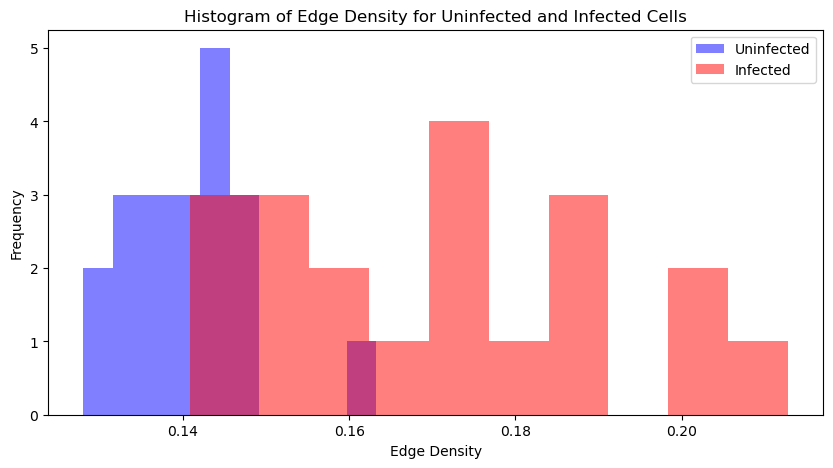

In [139]:
# Create histograms for uninfected and infected cells and average color
plt.figure(figsize=(10, 5))

plt.hist(edge_df["Uninfected_Edge_Density"], bins=10, alpha=0.5, label='Uninfected', color='blue')
plt.hist(edge_df["Infected_Edge_Density"], bins=10, alpha=0.5, label='Infected', color='red')

plt.xlabel('Edge Density')
plt.ylabel('Frequency')
plt.title('Histogram of Edge Density for Uninfected and Infected Cells')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [140]:
from scipy.stats import mannwhitneyu
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(edge_df["Uninfected_Edge_Density"], edge_df["Infected_Edge_Density"])

# Set significance level (alpha)
alpha = 0.05

# Compare p-value to alpha and interpret the result
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between uninfected and infected cells.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between uninfected and infected cells.")

# Print the test statistic and p-value
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Reject the null hypothesis. There is a significant difference between uninfected and infected cells.
Test Statistic: 22.5
P-value: 1.6335282645753348e-06


## Creating Averages of Color for each image

In [ ]:
#Use os to obtain the photos
parasitized_folder_path = os.path.join('Dataset', 'cell_images', 'Parasitized')
uninfected_folder_path = os.path.join('Dataset', 'cell_images', 'Uninfected')

#Have an empty list for parasitized average colors and uninfected average colors
parasitized_avg_colors = []
uninfected_avg_colors = []
i = 0
folder_path = parasitized_folder_path
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        
        # Load image
        img = cv2.imread(image_path)

        parasitized_avg_colors.append(img.mean())
        i += 1
    if i == 500: break

i = 0
folder_path = uninfected_folder_path
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        
        # Load image
        img = cv2.imread(image_path)

        uninfected_avg_colors.append(img.mean())
        i += 1
    if i == 500: break

In [134]:
#Create a DataFrame from the average colors

# Create a DataFrame with two columns
avg_colors_df = pd.DataFrame({'Parasitized_Avg_Colors': parasitized_avg_colors,
                              'Uninfected_Avg_Colors': uninfected_avg_colors})

# Display the first few rows of the DataFrame
avg_colors_df.head()

,Parasitized_Avg_Colors,Uninfected_Avg_Colors
0,133.491832,118.653807
1,132.621040,126.433029
2,113.769025,128.820641
3,121.016622,129.876280
4,126.731932,128.073351


(array([  4.,   6.,  19.,  30.,  49., 106., 159., 102.,  22.,   3.]),
 array([ 76.44367937,  83.88780367,  91.33192797,  98.77605227,
        106.22017656, 113.66430086, 121.10842516, 128.55254946,
        135.99667376, 143.44079806, 150.88492235]),
 <BarContainer object of 10 artists>)

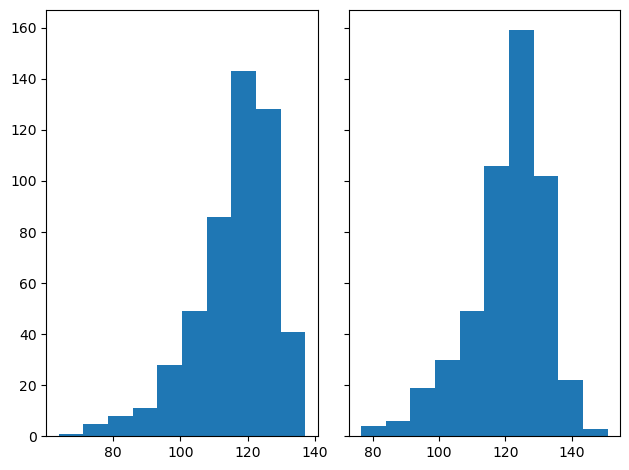

In [ ]:
dist1 = parasitized_avg_colors
dist2 = uninfected_avg_colors
n_bins = 10

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
import matplotlib.pyplot as plt
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

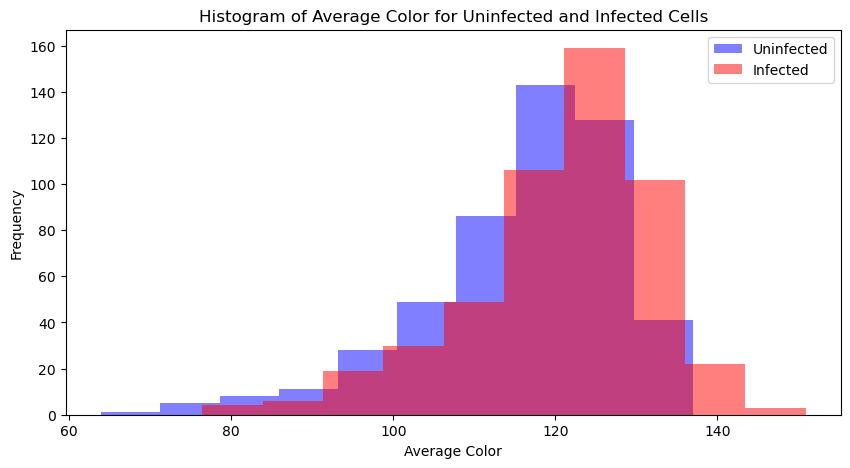

In [135]:
# Create histograms for uninfected and infected cells and average color
plt.figure(figsize=(10, 5))

plt.hist(parasitized_avg_colors, bins=10, alpha=0.5, label='Uninfected', color='blue')
plt.hist(uninfected_avg_colors, bins=10, alpha=0.5, label='Infected', color='red')

plt.xlabel('Average Color')
plt.ylabel('Frequency')
plt.title('Histogram of Average Color for Uninfected and Infected Cells')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [136]:
from scipy import stats
# Perform t-test
t_stat, p_value = stats.ttest_ind(parasitized_avg_colors, uninfected_avg_colors, equal_var=False)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between uninfected and infected cells.")
else:
    print("There is no statistically significant difference between uninfected and infected cells.")
(f"the p_value for the average colors is {p_value}")

There is a statistically significant difference between uninfected and infected cells.


'the p_value for the average colors is 1.4153968699116878e-10'

### Add all the EDA variables into a Pandas Dataframe

In [143]:
eda_df = pd.concat([edge_df, avg_colors_df, infected_blob_df, uninfected_blob_df], axis=1)

eda_df.to_csv('Dataset/eda.csv', index=False)

In [150]:
#Assess the dataframe

eda_df.head()

,Uninfected_Edge_Density,Infected_Edge_Density,Parasitized_Avg_Colors,Uninfected_Avg_Colors,Infected_MeanBlobSize,Infected_MaxBlobSize,Uninfected_MeanBlobSize,Uninfected_MaxBlobSize
0,0.1408,0.1744,133.491832,118.653807,5.027778,13.888889,2.074074,7.444444
1,0.1328,0.1696,132.621040,126.433029,5.833333,13.888889,1.585859,7.444444
2,0.1344,0.1680,113.769025,128.820641,4.866667,13.888889,3.148148,13.888889
3,0.1280,0.1840,121.016622,129.876280,3.148148,13.888889,6.370370,17.111111
4,0.1376,0.1696,126.731932,128.073351,2.611111,7.444444,4.222222,13.888889
